In [20]:
import matplotlib.pyplot as plt
import numpy as np
import sqlite3
conn = sqlite3.connect('happiness_index_2019(12).db')
conn.row_factory = sqlite3.Row
c = conn.cursor()

In [21]:

def getStats(Stats,Region):
    #### მიუთითებ სასურველ ქვეყანას და იმ
    #### სტატისტიკას რომლის ამოღებაც გსურს
    #### რის შემდეგაც ის დააბრუნებს ამ მონაცემებს.
    x = c.execute(f'SELECT {Stats} FROM happiness_index WHERE "Country or region" = ?',
                     (Region,)).fetchone()
    print(x[0])
getStats('Score', ('Georgia'))

4.519


In [22]:
def worldBuilder(country=None, score=None, GDPPerCapita=None,
                 socialSupport=None, healthyLifeExpectancy=None,
                 freedom=None, generosity=None, corruption=None):
    #### ამ ფუნქციის დახმარებით, შეიძლება შექმნა შენი ქვეყანა ამ დატაბაზაში
    #### ყველა ცვლადს default_ად აქვს მინიჭებული მნიშვნელობა None
    #### სიმარტივისთვის.
    c.execute(
        "INSERT INTO happiness_index (`Country or Region`, `Score`, `GDP per capita`, `Social support`, `Healthy life expectancy`, `Freedom to make life choices`, `Generosity`, `Perceptions of corruption`) VALUES (?, ?, ?, ?, ?, ?, ?, ?)",
        (country, score, GDPPerCapita, socialSupport, healthyLifeExpectancy, freedom, generosity, corruption)
    )
    conn.commit()
    print('country added successfully')

worldBuilder('US of A', 2, 0.2 ,2 ,2 ,2, 2, 2,)

country added successfully


In [23]:
def updateStuff(country, stat, newValue):
    c.execute(f'UPDATE happiness_index SET "{stat}" = {newValue} WHERE "Country or region" = "{country}" ')
    conn.commit()
    print(f"{country}'s statistic: {stat} has been replaced by {newValue} successfully")
updateStuff("US of A", "Score", 2 )

US of A's statistic: Score has been replaced by 2 successfully


In [24]:
def removeGDPLowerThan(desirableGDP):
    #### ამ ფუნქციით შეიძლება ამოშალო ის ქვეყნები,
    #### რომლებისაც თქვენს მიერ არჩეულ
    #### რიცხვზე ნაკლები GDP აქვთ.
    c.execute('DELETE FROM happiness_index WHERE "GDP per capita" < ?', (desirableGDP,))
    print(f"countries with GDP lower than: {desirableGDP} have been permanently deleted from this table, think before you use a suspicious command again, or you might as well just delete the whole table.")
    conn.commit()
removeGDPLowerThan(0.21)

countries with GDP lower than: 0.21 have been permanently deleted from this table, think before you use a suspicious command again, or you might as well just delete the whole table.


In [25]:
def selecter(min, max):
    #### ეს ფუნქცია ჩავთვალე საჭიროდ, რათ გამემარტივებინა
    #### matplotlib თან მუშაობა. ის ამოიღებს, მითებული
    #### მინიმუმისა და მაქსიმუმის მიხედვით, ქვეყნებს,
    #### დააბრუნებს მათ tuple ის სახლით, რომლის წევრების
    #### მნიშვნელობაც, იქნება ქვეყნების დასახელებები
    rows = c.execute('SELECT "Country or region" FROM happiness_index WHERE "Score"<? AND "Score">?', (max, min)).fetchall()
    return [row[0] for row in rows]

def bycountry(country):
    #### ეს ფუნქცია კი არის საჭირო, რათა for ციკლის დახმარებით
    #### ამოვიღო GDP ყველა შემავალი.
    rows = c.execute('SELECT "GDP per capita" FROM happiness_index WHERE "Country or region" = ?', (country,)).fetchall()
    return [row[0] for row in rows]



In [26]:
x = selecter(2, 4)

y = []
for i in range(len(x)):
    #### დააბრუნებს list ის სახით ყველა შესაფერის მნიშვნელობას.
    result = bycountry(x[i])
    # If result is a tuple like (value,), get the first element
    y.append(result[0] if result else None)

x = tuple(x)
print(x)#### გადასამოწმებლად
print(y)#### გადასამოწმებლად

('Comoros', 'Madagascar', 'Lesotho', 'Zimbabwe', 'Haiti', 'Botswana', 'Syria', 'Yemen', 'Rwanda', 'Tanzania', 'Afghanistan', 'South Sudan')
[0.274, 0.274, 0.489, 0.366, 0.323, 1.041, 0.619, 0.287, 0.359, 0.476, 0.35, 0.306]


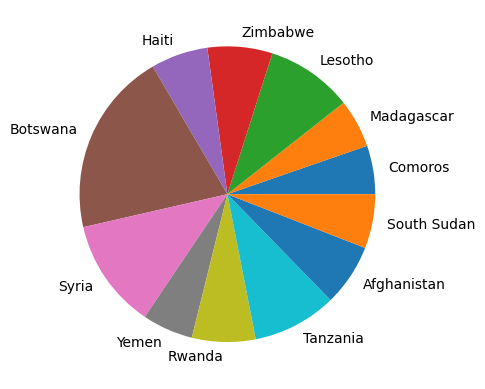

In [27]:
names = x
pieces = y
fig, ax = plt.subplots()
ax.pie(pieces, labels=names)
plt.show()
#### აჩვენებს pie chart ზე, თუ როგორი შეფარდებაა ჩვენს მიერ არჩეული ქვეყნების GDP ებს შორის

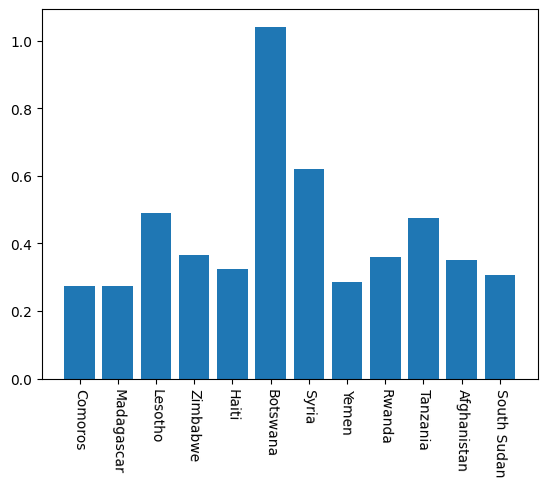

In [28]:
names2 =  x
GDP = y

plt.bar(names2, GDP)
plt.xticks(rotation=269)

plt.show()
#### საბოლოოდ, ყველა chart აჩვენებს ერთსა და იმავე რამეს,
#### რაც არ არის შემთვევითი, მაგრამ
#### ამის მიზეზი ნათელზე ნათელია, და არ საჭიროებს განხილვას.

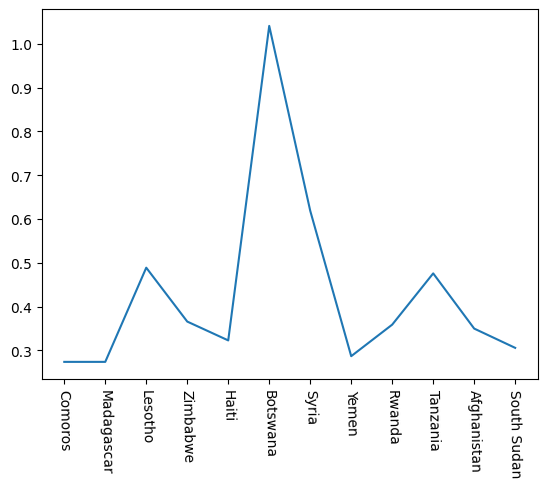

In [29]:
import matplotlib.pyplot as plt



plt.plot(x, y)
plt.xticks(rotation=271)

plt.show()

In [30]:
conn.close()